
# Sales Analysis

#### Import required libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter

#### Fetching Data from each csv file and merging it to create one file

In [2]:
path = os.getcwd()+"\\Sales_Data"
files =[file for file in os.listdir(path) if not file.startswith(".")] #ignores hidden files
all_month_data = pd.DataFrame()
for file in files:
    current_data = pd.read_csv(path + "\\"+ file)
    all_month_data = pd.concat([all_month_data,current_data])

all_month_data.to_csv("All_Month_Sales.csv", index=False)   

#### Loading and reading the new data in dataframe

In [3]:
all_data = pd.read_csv(os.getcwd()+"\\All_Month_Sales.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


We can see null values, so let us clean the data

#### Checking the size of dataframe

In [4]:
all_data.shape

(186850, 6)

#### Cleaning the data!
The first step in this is figuring out what we need to clean, firstly we will check all the nulls using isna function

#### Finding total null values

In [5]:
all_data[all_data.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


#### Dropping null values

In [6]:
all_data = all_data.dropna(how='all') # how= all specifies that we want to remove the field that has all null rows
all_data.shape

(186305, 6)

#### We notice that the we have repeating header values inside the dataframe which need to be removed before we do further analysis

In [7]:
all_data[all_data['Product'].str[:]=='Product'] 
#there are 355 rows which have the column headers as fillers and no values,
#which we will need to drop before we do further data processing

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [8]:
all_data = all_data[all_data['Product'].str[:]!='Product'] #we have use != operator to remove fillers
all_data.shape

(185950, 6)

#### Changing the format of Order Data to Column

In [9]:
all_data["Order Date"]= pd.to_datetime(all_data["Order Date"],format= "%m/%d/%y %H:%M")

#### Changing the format for Price Each and Quantity Ordered column

In [10]:
all_data["Price Each"]= all_data["Price Each"].astype("float")
all_data["Quantity Ordered"]= all_data["Quantity Ordered"].astype("int")

In [11]:
all_data.dtypes #data types have been converted as per our use

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

#### Now we will add derived columns which will assist in our EDA

In [12]:
all_data.insert(loc=5,column="Month Number", value = all_data['Order Date'].dt.month) #added Month Number Column
all_data["Month Number"].astype(dtype= "int32") #changing dtype of Month Number Column

0         4
2         4
3         4
4         4
5         4
         ..
186845    9
186846    9
186847    9
186848    9
186849    9
Name: Month Number, Length: 185950, dtype: int32

In [13]:
all_data.insert(loc= 5, column= "Sales", value= all_data["Quantity Ordered"]*all_data["Price Each"])
#get total sales for each order 

In [14]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Month Number,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,23.90,4,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,99.99,4,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,600.00,4,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,11.99,4,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,11.99,4,"333 8th St, Los Angeles, CA 90001"


#### Inserting City and State

In [15]:
def get_city(address):
    return address.split(",")[1] #splitting on comma,index=1 will fetch city name
def get_state(address) :
    return address.split(",")[2].split(" ")[1] #splitting on space and fetching the state using index= 2
all_data.insert(loc=7,column="City", value = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})"))

In [16]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Month Number,City,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,23.90,4,Dallas (TX),"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,99.99,4,Boston (MA),"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,600.00,4,Los Angeles (CA),"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,11.99,4,Los Angeles (CA),"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,11.99,4,Los Angeles (CA),"333 8th St, Los Angeles, CA 90001"


In [17]:
#Alternate method to extract city and state
all_data["Purchase Address"].apply(lambda x: f"{x.split(',')[1]}({x.split(',')[2].split(' ')[1]})")

0                 Dallas(TX)
2                 Boston(MA)
3            Los Angeles(CA)
4            Los Angeles(CA)
5            Los Angeles(CA)
                 ...        
186845       Los Angeles(CA)
186846     San Francisco(CA)
186847     San Francisco(CA)
186848     San Francisco(CA)
186849     San Francisco(CA)
Name: Purchase Address, Length: 185950, dtype: object

In [18]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Month Number,City,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,23.90,4,Dallas (TX),"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,99.99,4,Boston (MA),"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,600.00,4,Los Angeles (CA),"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,11.99,4,Los Angeles (CA),"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,11.99,4,Los Angeles (CA),"333 8th St, Los Angeles, CA 90001"


In [19]:
#reset_index
all_data.reset_index(drop=True, inplace=True)

In [20]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Month Number,City,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,23.90,4,Dallas (TX),"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,99.99,4,Boston (MA),"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,600.00,4,Los Angeles (CA),"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,11.99,4,Los Angeles (CA),"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,11.99,4,Los Angeles (CA),"333 8th St, Los Angeles, CA 90001"


#### Inserting Hour and Minute columns

In [21]:
all_data.insert(loc= 5, column="Hour", value= all_data["Order Date"].dt.hour)
all_data.insert(loc= 6, column="Minute", value= all_data["Order Date"].dt.minute)

#### Inserting Count column

In [22]:
all_data.insert(loc=11,column="Count", value= 1)

In [23]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Hour,Minute,Sales,Month Number,City,Purchase Address,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,8,46,23.90,4,Dallas (TX),"917 1st St, Dallas, TX 75001",1
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,22,30,99.99,4,Boston (MA),"682 Chestnut St, Boston, MA 02215",1
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,14,38,600.00,4,Los Angeles (CA),"669 Spruce St, Los Angeles, CA 90001",1
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,14,38,11.99,4,Los Angeles (CA),"669 Spruce St, Los Angeles, CA 90001",1
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,9,27,11.99,4,Los Angeles (CA),"333 8th St, Los Angeles, CA 90001",1


### Let us move to the Visualization Part

#### Question 1: What was the best month for sales? How much was earned that month? 

In [24]:
sales_monthly= all_data.groupby(by="Month Number", axis= 0).sum()["Sales"].apply(lambda x: round(x,2))
sales_monthly

Month Number
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

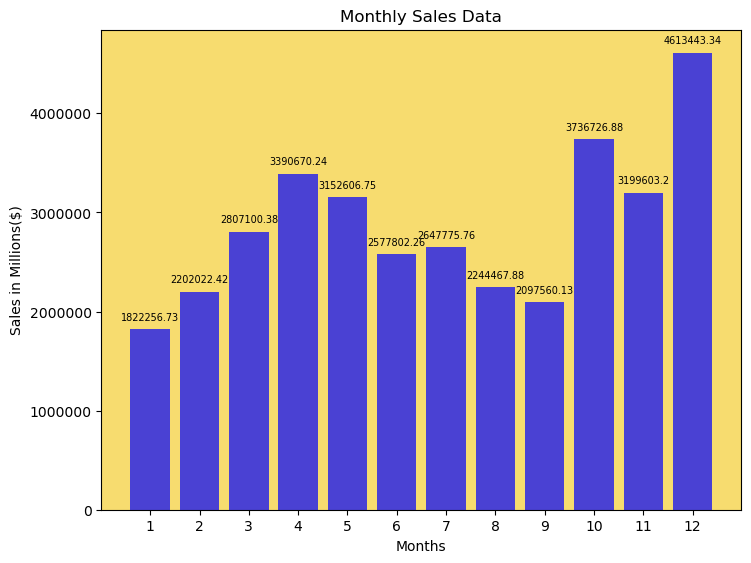

In [25]:
month_index = sales_monthly.index #x-axis
sales_list= sales_monthly.to_list() #adding data values on top of bars
fig= plt.figure(figsize=(8,6),dpi=100)
axes= fig.add_axes([0.1,0.1,0.8,0.8])
barplot=axes.bar(x= month_index,height= sales_monthly, color="b", alpha= 0.7, width=0.8)
axes.set_xticks(month_index)
plt.ticklabel_format(style='plain')
axes.set_facecolor("#F7DC6F")
axes.set_title("Monthly Sales Data")
axes.set_xlabel("Months")
axes.set_ylabel("Sales in Millions($)")
axes.bar_label(barplot, labels= sales_list, label_type="edge", padding=5, fontsize=7)
plt.show()

#### Question 2: What city sold the most product?

In [26]:
sales= all_data.groupby(by="City",axis= 0).sum()["Sales"].sort_values(ascending=False)
cities= all_data.groupby(by="City",axis= 0).sum()["Sales"].sort_values(ascending=False).index #we use this as x-
sales

City
 San Francisco (CA)    8262203.91
 Los Angeles (CA)      5452570.80
 New York City (NY)    4664317.43
 Boston (MA)           3661642.01
 Atlanta (GA)          2795498.58
 Dallas (TX)           2767975.40
 Seattle (WA)          2747755.48
 Portland (OR)         1870732.34
 Austin (TX)           1819581.75
 Portland (ME)          449758.27
Name: Sales, dtype: float64

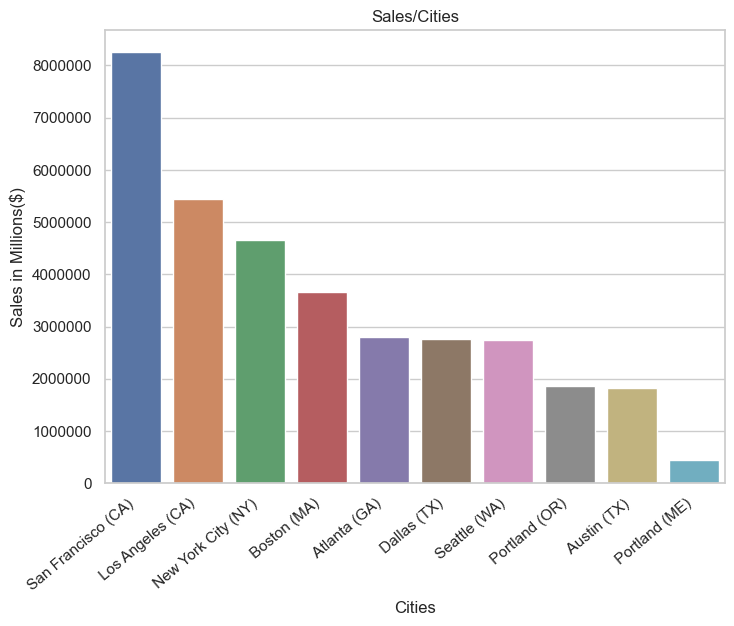

In [27]:
fig= plt.figure(figsize=(8,6),dpi=100)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x = cities, y = sales)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title("Sales/Cities")
ax.set_xlabel("Cities")
ax.set_ylabel("Sales in Millions($)")
plt.ticklabel_format(style='plain', axis='y')
plt.grid(axis="y",visible=True)
plt.show()


#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [28]:
#grouping count for products sold for each hour of day
sales_hourly = all_data.groupby("Hour").count()["Count"]
sales_hourly

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Count, dtype: int64

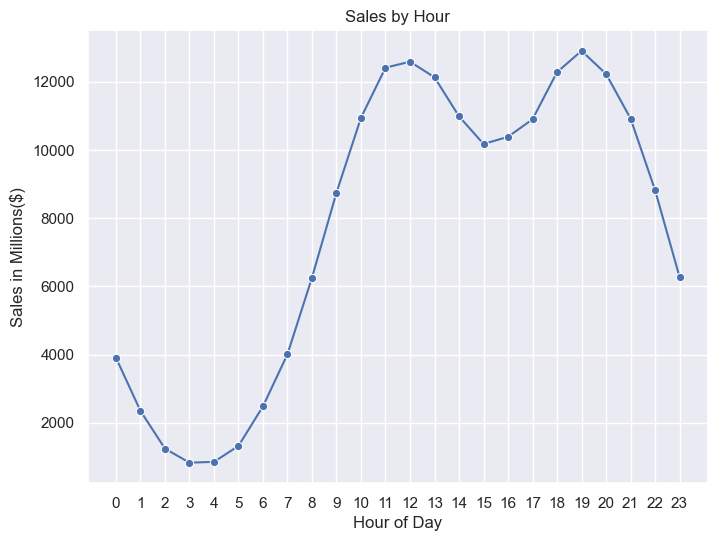

In [29]:
hour_num = all_data.groupby("Hour").count()["Count"].index
fig= plt.figure(figsize=(8,6),dpi=100)
sns.set_theme(style="darkgrid")
ax= sns.lineplot(x= hour_num, y= sales_hourly,marker= "o")
ax.set_xticks(hour_num)
ax.set_title("Sales by Hour")
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Sales in Millions($)")
plt.ticklabel_format(style='plain', axis='y')
plt.grid(visible= True)
plt.show()

##### We see two spikes: one after 11 AM and other during 7 PM, so we can push advertisements slightly before 11 AM and 7 PM to increase likelihood of customers purchasing products

#### Question 4: What products are most often sold together?

In [30]:
df= all_data.loc[all_data["Order ID"].duplicated(keep=False)] 
#keep parameter allows us to get all the occurences of duplicate Order ID

df.insert(loc=12,column= "Grouped", value= df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x)))
#adding new column, using transform and joining products (same Order ID) using comma

df2= df[["Order ID", "Grouped"]].drop_duplicates() #we have used drop_duplicates
# to keep only one occurence of Order ID
df2

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
185882,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
185884,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
185892,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
185904,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [31]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
count= Counter()
for data in df2["Grouped"]:
    list_data= data.split(",")
    count.update(Counter(combinations(list_data,2)))
    
for key,value in count.most_common(10):
    print(key,":",value)

('iPhone', 'Lightning Charging Cable') : 1005
('Google Phone', 'USB-C Charging Cable') : 987
('iPhone', 'Wired Headphones') : 447
('Google Phone', 'Wired Headphones') : 414
('Vareebadd Phone', 'USB-C Charging Cable') : 361
('iPhone', 'Apple Airpods Headphones') : 360
('Google Phone', 'Bose SoundSport Headphones') : 220
('USB-C Charging Cable', 'Wired Headphones') : 160
('Vareebadd Phone', 'Wired Headphones') : 143
('Lightning Charging Cable', 'Wired Headphones') : 92


##### We see both Iphone and Lightining Charging Cable have been purchased together most number of times

#### Question 5: What product sold the most? Why do you think it sold the most?

In [32]:
bestselling_products= all_data.groupby("Product").sum()["Quantity Ordered"].sort_index(ascending= True)
bestselling_products_index= all_data.groupby("Product").sum()["Quantity Ordered"].sort_index(ascending= True).index
bestselling_products

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32

In [33]:
prices= all_data.groupby("Product").mean()["Price Each"].sort_index(ascending=True)
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

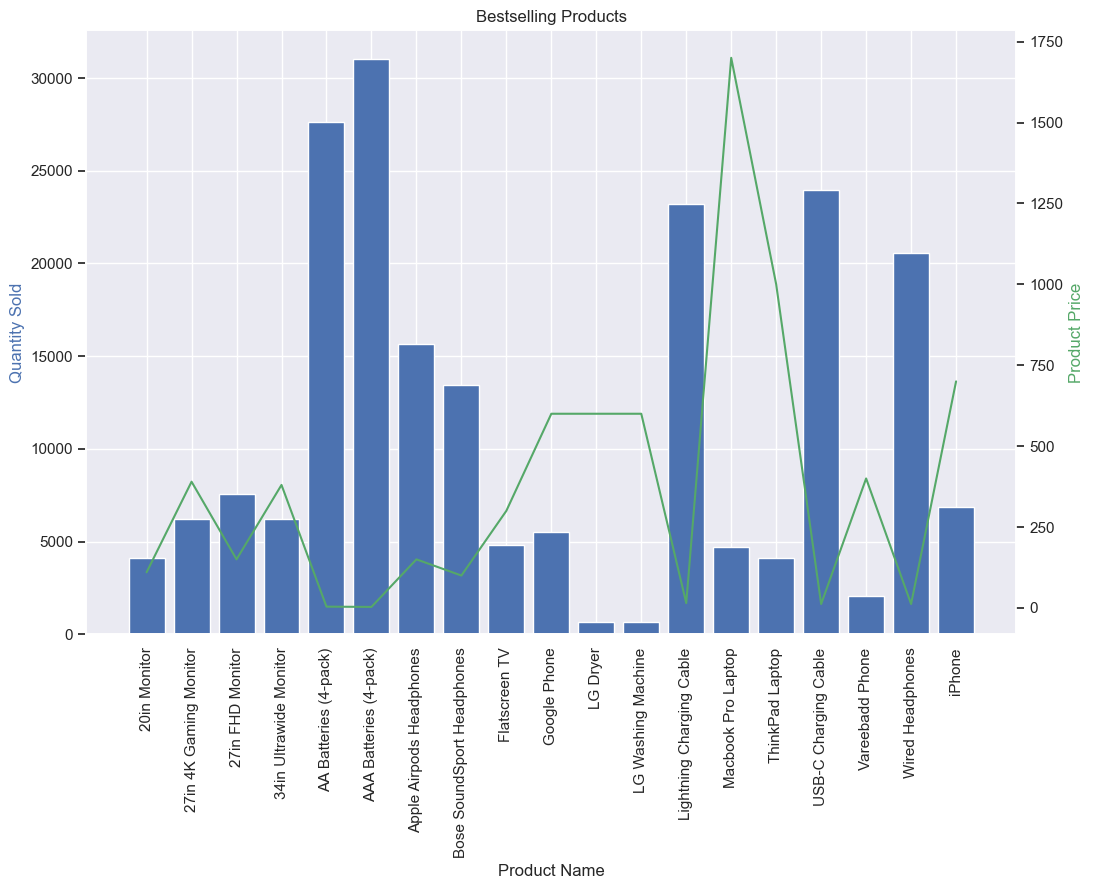

In [34]:
fig, ax1 = plt.subplots(figsize=(12, 8),dpi=100)
ax2= ax1.twinx()
ax1.bar(bestselling_products_index, bestselling_products)
ax2.plot(bestselling_products_index,prices,'g-')
ax1.tick_params(axis='x', labelrotation = 90)
plt.title("Bestselling Products")
ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Sold",color='b')
ax2.set_ylabel("Product Price",color='g')
plt.grid(visible=False)
plt.show()


##### AAA Batteries(4-pack) with 31017 has most quantity sold as it is priced at 2.99 Dollars, LG Dryer has 646 quantity sold as it is priced at 600.00 Dollars

## Thank You!